# 70 Dog Breeds Neural Net

Data Exploration Stage:

In [257]:
import pandas as pd
import seaborn as sns


## Learning

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Rescaling
from keras.preprocessing.image import ImageDataGenerator

In [2]:
oldsize = (224, 224)
newsize = (112, 112)
bSize = 128
lRate = 0.01
Epochs = 160
autotuneme = True

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'train',
  #validation_split=0.2,
  #subset="training",
  seed=123,
  image_size=oldsize,
  batch_size=bSize,
  labels = 'inferred'
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
  'valid',
  seed=123,
  image_size=oldsize,
  batch_size=bSize,
  labels = 'inferred'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
  'test',
  seed=123,
  image_size=oldsize,
  batch_size=bSize,
  labels = 'inferred'
)

Found 7946 files belonging to 70 classes.
Found 700 files belonging to 70 classes.
Found 700 files belonging to 70 classes.


## Displaying Images and classes

In [5]:
class_names = train_ds.class_names
print(class_names)

['Afghan', 'African Wild Dog', 'Airedale', 'American Hairless', 'American Spaniel', 'Basenji', 'Basset', 'Beagle', 'Bearded Collie', 'Bermaise', 'Bichon Frise', 'Blenheim', 'Bloodhound', 'Bluetick', 'Border Collie', 'Borzoi', 'Boston Terrier', 'Boxer', 'Bull Mastiff', 'Bull Terrier', 'Bulldog', 'Cairn', 'Chihuahua', 'Chinese Crested', 'Chow', 'Clumber', 'Cockapoo', 'Cocker', 'Collie', 'Corgi', 'Coyote', 'Dalmation', 'Dhole', 'Dingo', 'Doberman', 'Elk Hound', 'French Bulldog', 'German Sheperd', 'Golden Retriever', 'Great Dane', 'Great Perenees', 'Greyhound', 'Groenendael', 'Irish Spaniel', 'Irish Wolfhound', 'Japanese Spaniel', 'Komondor', 'Labradoodle', 'Labrador', 'Lhasa', 'Malinois', 'Maltese', 'Mex Hairless', 'Newfoundland', 'Pekinese', 'Pit Bull', 'Pomeranian', 'Poodle', 'Pug', 'Rhodesian', 'Rottweiler', 'Saint Bernard', 'Schnauzer', 'Scotch Terrier', 'Shar_Pei', 'Shiba Inu', 'Shih-Tzu', 'Siberian Husky', 'Vizsla', 'Yorkie']


In [7]:
data_augmentation = tf.keras.Sequential(
  [layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.3),
  layers.RandomZoom(0.2)]
)

In [8]:
cnnModel = Sequential()

cnnModel.add(data_augmentation)

cnnModel.add(Rescaling((1. / 1), input_shape = (224, 224, 3)))

cnnModel.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((2, 2)))
cnnModel.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((2, 2)))
cnnModel.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((2, 2)))
cnnModel.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((2, 2)))
cnnModel.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((2, 2)))

cnnModel.add(Flatten())

cnnModel.add(Dense(512, activation='relu'))
cnnModel.add(Dense(256, activation='relu'))
cnnModel.add(Dense(128, activation='relu'))
cnnModel.add(Dense(len(class_names), activation = 'softmax'))

In [290]:
cnnModel.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [291]:
history = cnnModel.fit(
    train_ds,
    validation_data=validation_ds,
    batch_size = bSize,
    epochs = Epochs
)

Epoch 1/160
63/63 [==============================] - 12s 155ms/step - loss: 5.8634 - accuracy: 0.0237 - val_loss: 4.1975 - val_accuracy: 0.0257
Epoch 2/160
63/63 [==============================] - 10s 150ms/step - loss: 4.1114 - accuracy: 0.0340 - val_loss: 4.0319 - val_accuracy: 0.0286
Epoch 3/160
63/63 [==============================] - 10s 149ms/step - loss: 3.9981 - accuracy: 0.0419 - val_loss: 4.0560 - val_accuracy: 0.0314
Epoch 4/160
63/63 [==============================] - 10s 149ms/step - loss: 3.8910 - accuracy: 0.0637 - val_loss: 4.2048 - val_accuracy: 0.0343
Epoch 5/160
63/63 [==============================] - 10s 149ms/step - loss: 3.7470 - accuracy: 0.0837 - val_loss: 3.6412 - val_accuracy: 0.0814
Epoch 6/160
63/63 [==============================] - 10s 150ms/step - loss: 3.5461 - accuracy: 0.1099 - val_loss: 3.7307 - val_accuracy: 0.0971
Epoch 7/160
63/63 [==============================] - 10s 149ms/step - loss: 3.5798 - accuracy: 0.1095 - val_loss: 3.4035 - val_accuracy:

## Let's plot and evaluate

In [281]:
cnnModel.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                

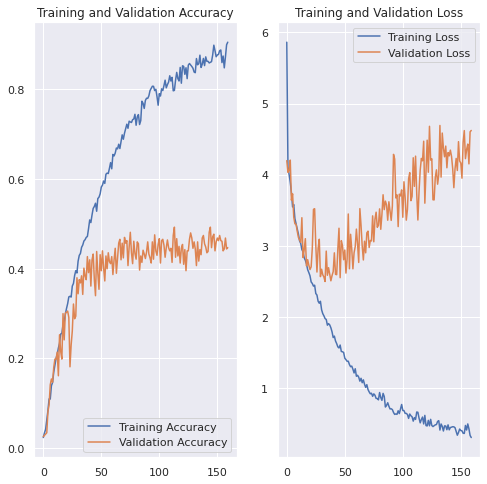

In [292]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [294]:
test_loss, test_acc = cnnModel.evaluate(test_ds, verbose=2)
display((test_loss, test_acc))

6/6 - 1s - loss: 3.7341 - accuracy: 0.4714 - 618ms/epoch - 103ms/step


(3.7340610027313232, 0.4714285731315613)